This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).


8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.


9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: Unable to import required dependencies:
numpy: No module named 'numpy.core._ufunc_config'

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('household_power_consumption.csv', low_memory=False,sep=';')
df

In [ ]:
df['Global_reactive_power'][6839]

In [ ]:
df.isnull().sum()

In [2]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Date']= pd.to_datetime(df['Date']) 
df['Time']= pd.to_datetime(df['Time']) 

NameError: name 'pd' is not defined

In [3]:
df.isnull().sum()

NameError: name 'df' is not defined

In [4]:
df.info()

NameError: name 'df' is not defined

We'll have to fill the missing values of all the columns so we are now gonna replace them with their column's mean values

In [5]:
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)

NameError: name 'df' is not defined

In [6]:
df.iloc[6839]

NameError: name 'df' is not defined

In [97]:
df.iloc[6840]

Date                     2006-12-21 00:00:00
Time                     2020-04-29 11:24:00
Global_active_power                  1.09162
Global_reactive_power               0.123714
Voltage                               240.84
Global_intensity                     4.62776
Sub_metering_1                       1.12192
Sub_metering_2                       1.29852
Sub_metering_3                       6.45845
Name: 6840, dtype: object

In [98]:
def find_month(x):
    return x.month
df['Month']= df['Date'].apply( lambda x: find_month(x))

In [99]:
def find_hour(x):
    return x.hour
df['Hour']= df['Time'].apply( lambda x: find_hour(x))

In [100]:
def find_year(x):
    return x.year
df['Year']= df['Date'].apply( lambda x: find_year(x))

In [101]:
df.drop('Date',axis=1,inplace=True)

In [102]:
df.drop('Time',axis=1,inplace=True)

In [103]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Hour,Year
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,17,2006
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,17,2006
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,17,2006
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,17,2006
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,17,2006
...,...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,11,20,2010
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,11,20,2010
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,11,21,2010
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,11,21,2010


In [104]:
sum(df.duplicated())

39325

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
sum(df.duplicated())

0

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035934 entries, 0 to 2075258
Data columns (total 10 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Month                    int64
Hour                     int64
Year                     int64
dtypes: float64(7), int64(3)
memory usage: 170.9 MB


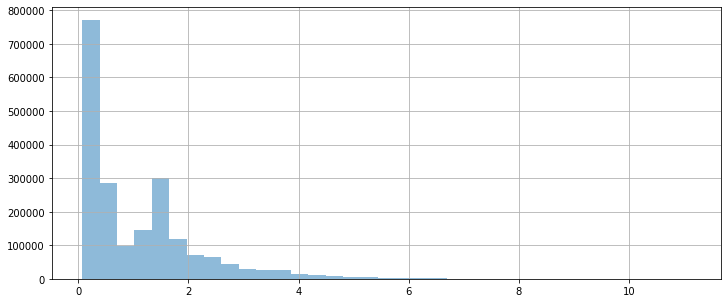

In [22]:
plt.figure(figsize=(12,5))
df['Global_active_power'].hist(bins=35,alpha=0.5)

Correlation matrices for the following data

In [23]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Hour,Year
Global_active_power,1.000000,0.244274,-0.400665,0.998886,0.484638,0.434581,0.637591,0.005624,0.281146,-0.036230
Global_reactive_power,0.244274,1.000000,-0.111692,0.263382,0.122514,0.138475,0.087134,0.012581,0.126441,0.045473
Voltage,-0.400665,-0.111692,1.000000,-0.412306,-0.196332,-0.167620,-0.268375,0.039383,-0.175826,0.254827
Global_intensity,0.998886,0.263382,-0.412306,1.000000,0.489553,0.440372,0.625543,0.005115,0.281508,-0.040551
Sub_metering_1,0.484638,0.122514,-0.196332,0.489553,1.000000,0.054490,0.102193,-0.000982,0.108445,-0.012959
Sub_metering_2,0.434581,0.138475,-0.167620,0.440372,0.054490,1.000000,0.080337,-0.003423,0.087016,-0.036494
Sub_metering_3,0.637591,0.087134,-0.268375,0.625543,0.102193,0.080337,1.000000,-0.000875,0.112796,0.061004
Month,0.005624,0.012581,0.039383,0.005115,-0.000982,-0.003423,-0.000875,1.000000,-0.000882,-0.073954
Hour,0.281146,0.126441,-0.175826,0.281508,0.108445,0.087016,0.112796,-0.000882,1.000000,-0.001449
Year,-0.036230,0.045473,0.254827,-0.040551,-0.012959,-0.036494,0.061004,-0.073954,-0.001449,1.000000


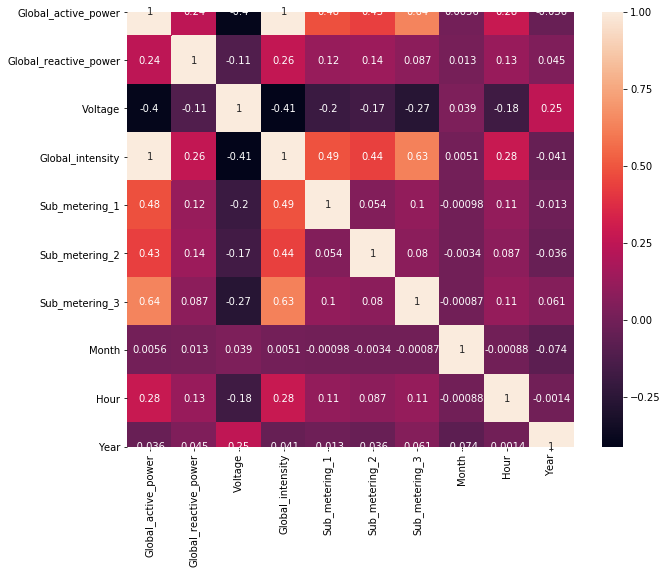

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Scatterplot of Global_active_power and Global_active_power

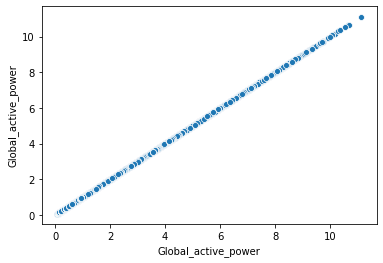

In [65]:
sns.scatterplot(x='Global_active_power',y='Global_active_power',data=df,hue_order=hex)

Lineplot of the yearly,hourly and monthly change of Global_active_power

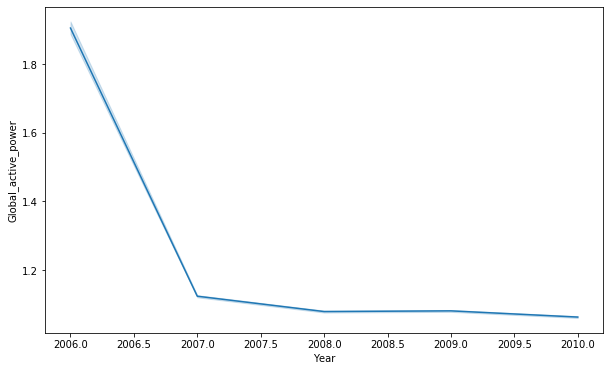

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Global_active_power",
             data=df)

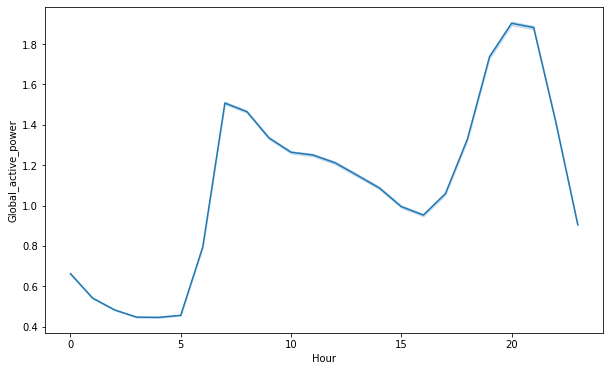

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Hour", y="Global_active_power",
             data=df)

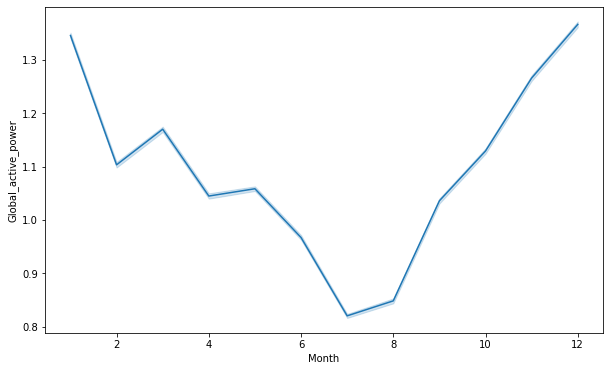

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="Global_active_power",
             data=df)

Monthly change of Global_active_power

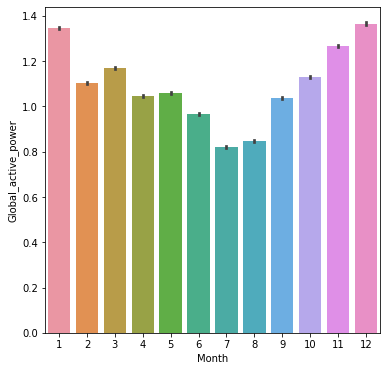

In [40]:
plt.figure(figsize=(6,6))
sns.barplot(x="Month", y="Global_active_power",
             data=df)

Yearly change of Global_active_power

In [1]:
plt.figure(figsize=(6,6))
sns.barplot(x="Year", y="Global_active_power",
             data=df)

NameError: name 'plt' is not defined

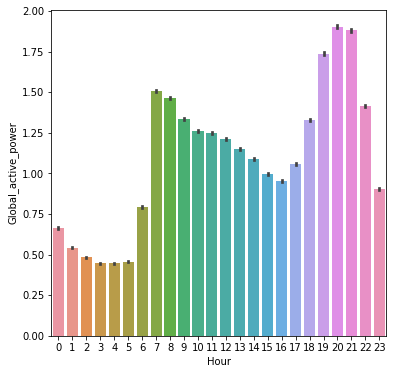

In [43]:
plt.figure(figsize=(6,6))
sns.barplot(x="Hour", y="Global_active_power",
             data=df)

Correlation of Global_active_power with all other data

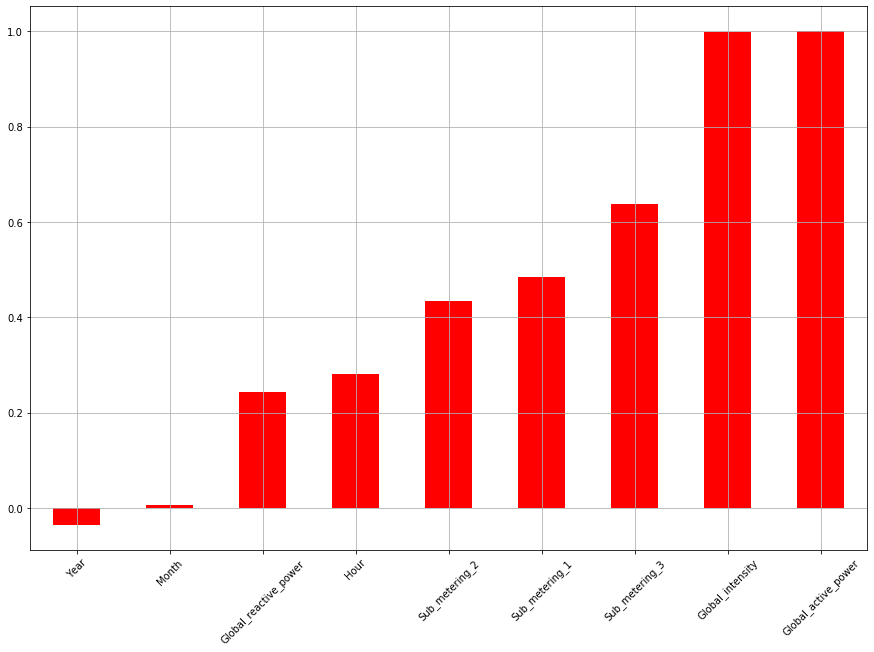

In [62]:
plt.figure(figsize=(15,10))
df.corrwith(df['Global_active_power']).sort_values().plot.bar(color='r',grid=True,rot=45,)

Line plot of the change of monthly change of sub metering 

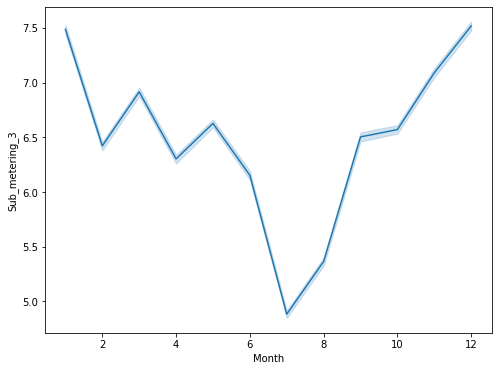

In [51]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Month", y="Sub_metering_3",
             data=df)

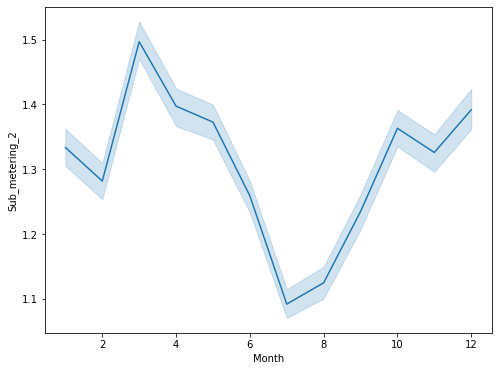

In [52]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Month", y="Sub_metering_2",
             data=df)

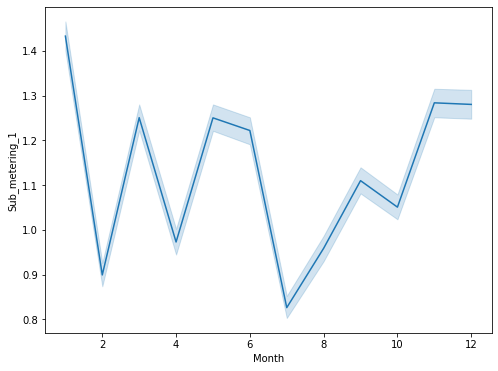

In [53]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Month", y="Sub_metering_1",
             data=df)

Scatter Plot of Global_active_power with all 3 Sub_metering

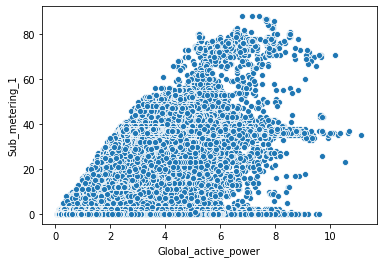

In [54]:
sns.scatterplot(x='Global_active_power',y='Sub_metering_1',data=df)

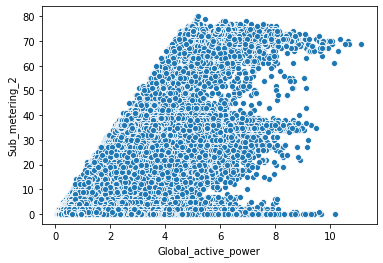

In [55]:
sns.scatterplot(x='Global_active_power',y='Sub_metering_2',data=df)

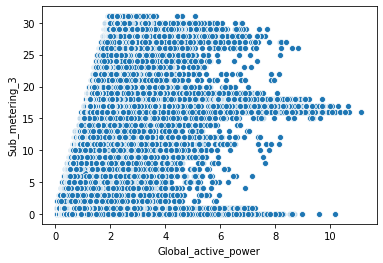

In [56]:
sns.scatterplot(x='Global_active_power',y='Sub_metering_3',data=df)

In [57]:
df.corr()['Voltage'].sort_values()

Global_intensity        -0.412306
Global_active_power     -0.400665
Sub_metering_3          -0.268375
Sub_metering_1          -0.196332
Hour                    -0.175826
Sub_metering_2          -0.167620
Global_reactive_power   -0.111692
Month                    0.039383
Year                     0.254827
Voltage                  1.000000
Name: Voltage, dtype: float64

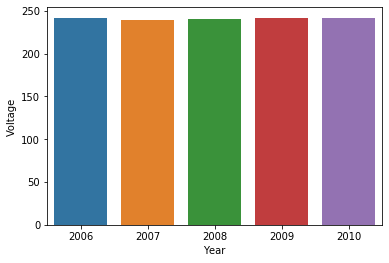

In [58]:
sns.barplot(y='Voltage',x='Year',data=df)

Since voltage isnt providing much info to our analysis it should be dropped

In [59]:
df.drop('Voltage',axis=1,inplace=True)

In [60]:
df

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Hour,Year
0,4.216,0.418,18.4,0.0,1.0,17.0,12,17,2006
1,5.360,0.436,23.0,0.0,1.0,16.0,12,17,2006
2,5.374,0.498,23.0,0.0,2.0,17.0,12,17,2006
3,5.388,0.502,23.0,0.0,1.0,17.0,12,17,2006
4,3.666,0.528,15.8,0.0,1.0,17.0,12,17,2006
...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,4.0,0.0,0.0,0.0,11,20,2010
2075255,0.944,0.000,4.0,0.0,0.0,0.0,11,20,2010
2075256,0.938,0.000,3.8,0.0,0.0,0.0,11,21,2010
2075257,0.934,0.000,3.8,0.0,0.0,0.0,11,21,2010


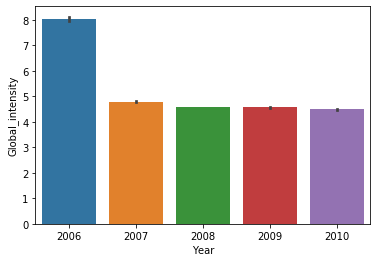

In [61]:
sns.barplot(y='Global_intensity',x='Year',data=df)

**Setting X and y variables to the .values of the features and label.**

In [27]:
X = df.drop('Global_active_power',axis=1).values

In [28]:
y= df['Global_active_power'].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

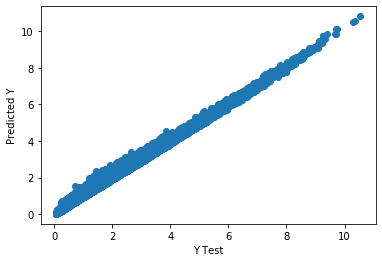

In [34]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [35]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.025836025731419965
MSE: 0.0016377697369462487
RMSE: 0.040469367884194196


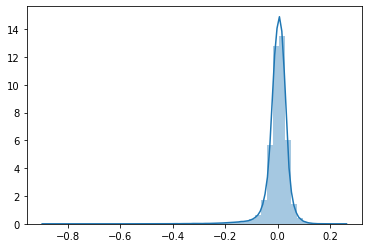

In [36]:
sns.distplot((y_test-predictions),bins=50)

In [70]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1

,Actual,Predicted
0,1.442,1.449559
1,0.302,0.274310
2,3.356,3.424248
3,1.544,1.523362
4,1.326,1.333631
...,...,...
610776,0.326,0.321725
610777,1.846,1.827048
610778,2.074,2.146216
610779,0.958,1.117439


## Normalizing the Data
**Using a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()

In [111]:
X_train = scaler.fit_transform(X_train)

In [112]:
X_test = scaler.transform(X_test)

# Creating the Model

In [125]:
import tensorflow as tf

In [126]:
from tensorflow.keras.models import Sequential


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Aradhya\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Aradhya\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\Aradhya\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\Aradhya\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\Aradhya\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.

During handling of the above exception, another exception occurred:

Traceback (most r

TypeError: can only concatenate str (not "list") to str

In [ ]:
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm